# Progetto Analisi Dati - Titanic

## Data reading

In [1]:
#Installa le librerie 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sp
%matplotlib inline

In [3]:
!pip install plotly
!pip install cufflinks

In [4]:
from plotly.offline import iplot
import plotly as py
import cufflinks as cf

In [5]:
!pip install ipywidgets --upgrade

In [6]:
import re

In [7]:
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [8]:
py.__version__ #controlliamo la versione di plotly presente

'5.1.0'

In [9]:
py.offline.init_notebook_mode(connected=True)

In [10]:
cf.go_offline()

In [11]:
#importiamo il dataset in due variabili diverse
df = pd.read_csv("titanic.csv") 
df2 = pd.read_csv("titanic.csv")

In [12]:
df.shape #visualizza le dimensioni del dataset

(891, 12)

In [13]:
df.tail(3) #visualizziamo dei dettagli delle ultime 5 righe del dataset
#per avere un'idea dei valori che lo compongono

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## Data cleaning

In [15]:
df.isnull().sum() 
#visualizziamo quali colonne 
#presentano tali valori nulli

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
#Puliamo i due dataset separandoli, in modo da eliminare in df2 i NaN di Age e Embarked,
#e in df i NaN all'interno della colonna Cabin.
# In questo modo limitiamo l'importante perdita di dati derivata dall'eliminazione 
# dei 687 NaN di Cabin che influenzano il resto del dataset. 

In [17]:
df2.dropna(subset=["Age"], inplace=True) #puliamo la colonna Age

In [18]:
df.dropna(subset=["Cabin"], inplace=True) #puliamo la colonna Cabin

In [19]:
df2.dropna(subset=["Embarked"], inplace=True) #puliamo la colonna Embarked

In [20]:
df2.isnull().sum() #controlliamo se le modifiche sono avvenute

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          529
Embarked         0
dtype: int64

In [21]:
df.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            19
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin           0
Embarked        2
dtype: int64

## Sezione modifica variabili e stile

In [22]:
df2['Sex'] = df2['Sex'].map({'male':0, 'female':1})  
#trasformiamo in numero binario le variabili qualitative, per semplificare il 
#calcolo della correlazione

In [23]:
#inizializziamo delle variabili contenenti delle palette per i vari tipi di grafico
colorsbarre = ['#d8b365', '#5ab4ac','#1b9e77']
colorstorta = ['#edf8b1','#7fcdbb','#2c7fb8']

In [24]:
df["Cabin"].head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [26]:
pd.Series(df["Cabin"]).replace("A\d*", "A", regex=True, inplace=True)
pd.Series(df["Cabin"]).replace("B\d*", "B", regex=True, inplace=True)
pd.Series(df["Cabin"]).replace("C\d*", "C", regex=True, inplace=True)
pd.Series(df["Cabin"]).replace("D\d*", "D", regex=True, inplace=True)
pd.Series(df["Cabin"]).replace("E\d*", "E", regex=True, inplace=True)
pd.Series(df["Cabin"]).replace("F\d*", "F", regex=True, inplace=True)
pd.Series(df["Cabin"]).replace("G\d*", "G", regex=True, inplace=True)
pd.Series(df["Cabin"]).replace("T\d*", "T", regex=True, inplace=True)


In [27]:
df["Cabin"].head(10)

1         C
3         C
6         E
10        G
11        C
21        D
23        A
27    C C C
31        B
52        D
Name: Cabin, dtype: object

In [28]:
pd.Series(df["Cabin"]).replace("^A", "Ponte Passeggiata Superiore", regex=True, inplace=True)
pd.Series(df["Cabin"]).replace("^B(\sB)*", "Ponte Passeggiata", regex=True, inplace=True)
pd.Series(df["Cabin"]).replace("^C(\sC)*", "Ponte Superiore", regex=True, inplace=True)
pd.Series(df["Cabin"]).replace("^D(\sD)*", "Ponte Salone", regex=True, inplace=True)
pd.Series(df["Cabin"]).replace("^E(\s\w)*", "Ponte Principale", regex=True, inplace=True)
pd.Series(df["Cabin"]).replace("^F(\s\w)*", "Ponte Centrale", regex=True, inplace=True)
pd.Series(df["Cabin"]).replace("^F(\s[EG])*", "Ponte Centrale", regex=True, inplace=True)
pd.Series(df["Cabin"]).replace("^G", "Ponte Inferiore", regex=True, inplace=True)
pd.Series(df["Cabin"]).replace("^T", "Ponte Imbarcazioni", regex=True, inplace=True)

In [29]:
# Fonte: http://www.titanicdiclaudiobossi.com/Html/Cabine%20del%20Titanic_158.htm

In [30]:
df["Cabin"].head(5)

1      Ponte Superiore
3      Ponte Superiore
6     Ponte Principale
10     Ponte Inferiore
11     Ponte Superiore
Name: Cabin, dtype: object

In [31]:
df["Cabin"].value_counts()

Ponte Superiore                59
Ponte Passeggiata              47
Ponte Salone                   33
Ponte Principale               32
Ponte Passeggiata Superiore    15
Ponte Centrale                 13
Ponte Inferiore                 4
Ponte Imbarcazioni              1
Name: Cabin, dtype: int64

## Statistiche sopravvissuti-morti

In [32]:
#selezioniamo la colonna "Survived" dal dataset 
#e contiamo quanti passeggeri hanno come valore 1 (sopravvissuti), e quanti con 0.

In [33]:
sopravvissuti_morti = df2["Survived"].value_counts()
sopravvissuti_morti

0    424
1    288
Name: Survived, dtype: int64

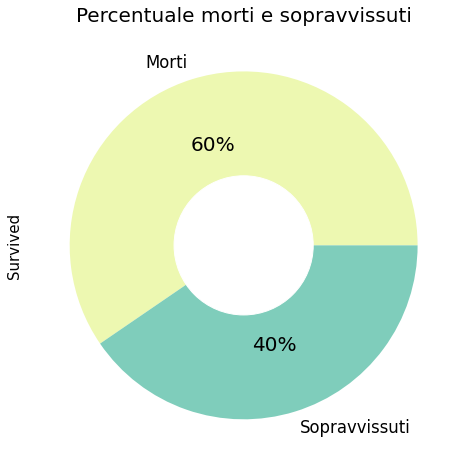

In [34]:
labels = ['Morti', 'Sopravvissuti']
plt.figure(figsize = (8,8))
sns.set_context("notebook", font_scale=1.5, rc={"font.size":20, "axes.titlesize":20, "axes.labelsize":15})
sopravvissuti_morti.plot.pie(labels = labels, autopct ="%1.0f%%", colors = colorstorta)
c = plt.Circle((0,0), 0.4, color='white')
plt.gca().add_artist(c)
plt.title("Percentuale morti e sopravvissuti")
plt.show()

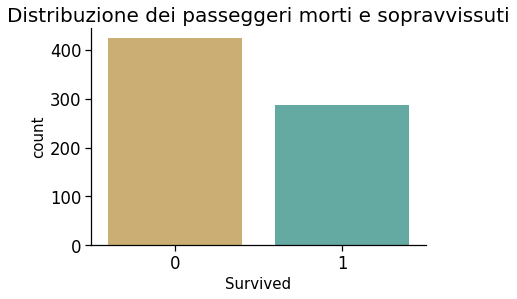

In [35]:
ax = sns.countplot(x='Survived',data=df2, palette= colorsbarre)
plt.rcParams["figure.figsize"] = [10,7]
sns.set_context("notebook", font_scale=1.5, rc={"font.size": 20, "axes.titlesize":20, "axes.labelsize":20})
sns.despine(right=True) #toglie la cornice alla destra del grafico
ax.set(title = 'Distribuzione dei passeggeri morti e sopravvissuti')
plt.show()

## Statistiche distribuzione classi

In [36]:
classi = df2["Pclass"].value_counts()
classi

3    355
1    184
2    173
Name: Pclass, dtype: int64

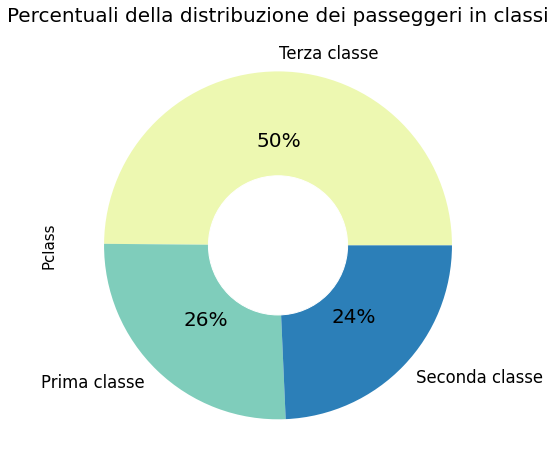

In [37]:
labels =["Terza classe", "Prima classe", "Seconda classe"]
plt.figure(figsize = (8,8))
sns.set_context("notebook", font_scale=1.5, rc={"font.size":20, "axes.titlesize":20, "axes.labelsize":15})
classi.plot.pie(labels = labels, autopct ="%1.0f%%", colors = colorstorta)
c = plt.Circle ((0,0), 0.4, color="white")
plt.gca().add_artist(c)
plt.title("Percentuali della distribuzione dei passeggeri in classi")
plt.show()

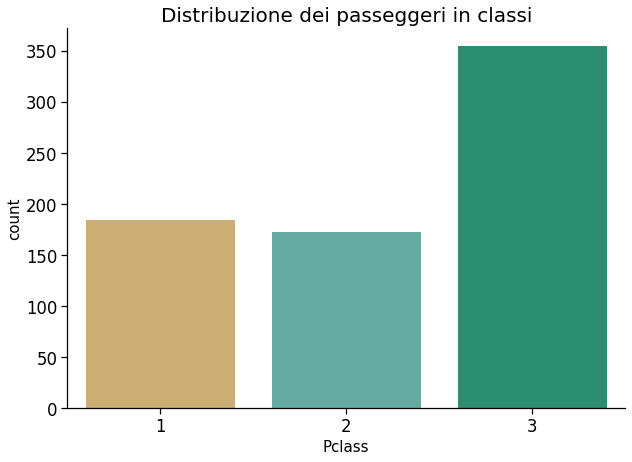

In [38]:
ax = sns.countplot(x='Pclass',data=df2,palette= colorsbarre)
plt.rcParams["figure.figsize"] = [10,7]
sns.despine(right=True)
ax.set(title = 'Distribuzione dei passeggeri in classi')
plt.show()

## Statistiche della distribuzione di genere

In [39]:
sesso= df2["Sex"].value_counts()
sesso

0    453
1    259
Name: Sex, dtype: int64

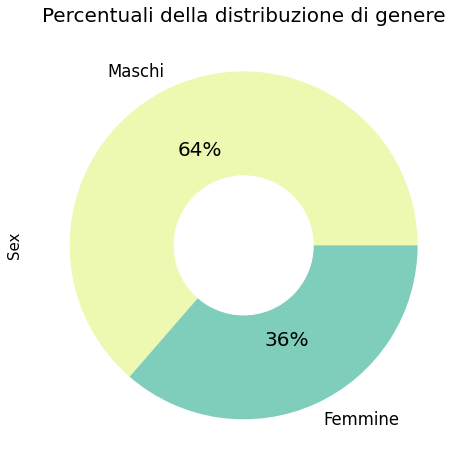

In [40]:
labels =["Maschi", "Femmine"]
plt.figure(figsize = (8,8))
sns.set_context("notebook", font_scale=1.5, rc={"font.size":20, "axes.titlesize":20, "axes.labelsize":15})
sesso.plot.pie(labels = labels, autopct ="%1.0f%%", colors = colorstorta)
c = plt.Circle ((0,0), 0.4, color="white")
plt.gca().add_artist(c)
plt.title("Percentuali della distribuzione di genere")
plt.show()

## Statistiche età

In [41]:
age = df2["Age"].value_counts()
age

24.00    30
22.00    27
18.00    26
28.00    25
19.00    25
         ..
55.50     1
74.00     1
0.92      1
70.50     1
12.00     1
Name: Age, Length: 88, dtype: int64

In [42]:
np.std(df2["Age"]) #troviamo la deviazione standard


14.48275170278997

In [43]:
df2["Age"].mean() #media

29.64209269662921

In [44]:
df2["Age"].median() #mediana

28.0

In [45]:
df2["Age"].max() #valore massimo

80.0

In [46]:
df2["Age"].min() #valore minimo

0.42

In [47]:
Q1 = df2["Age"].quantile(0.25, interpolation="linear") #troviamo il primo quartile

In [48]:
Q3 = df2["Age"].quantile(0.75, interpolation="linear") #... e il terzo quartile

In [49]:
IQR = Q3-Q1 #Troviamo l'intervallo interquartile con la differenza tra il terzo e il primo quartile

In [50]:
Lowerfence=Q1-1.5*IQR #troviamo la soglia superiore e inferiore entro le quali i dati possono essere considerati normali
Upperfence=Q3+1.5*IQR

In [51]:
Lowerfence

-7.0

In [52]:
Upperfence

65.0

In [53]:
OUTLIERS = df2.loc[(df["Age"] < Lowerfence)  |  (df2["Age"] > Upperfence) ] #estraiamo i valori anomali

In [54]:
NORMAL = df2.loc[(df["Age"] > Lowerfence)  & (df2["Age"] < Upperfence) ] #e i valori entro le soglie

In [55]:
OUTLIERS

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
96,97,0,1,"Goldschmidt, Mr. George B",0,71.0,0,0,PC 17754,34.6542,A5,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",0,80.0,0,0,27042,30.0000,A23,S
745,746,0,1,"Crosby, Capt. Edward Gifford",0,70.0,1,1,WE/P 5735,71.0000,B22,S


In [56]:
NORMAL.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",1,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",1,58.0,0,0,113783,26.5500,C103,S


In [57]:
df2["Age"].describe()

count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

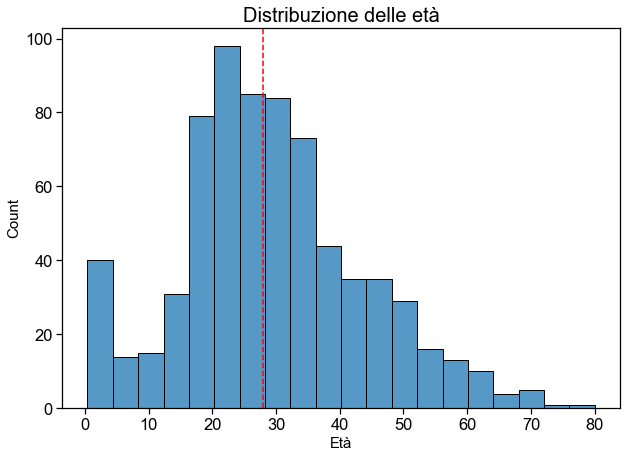

In [58]:
sns.histplot(df2["Age"])
plt.rcParams["figure.figsize"] = [10,7]
sns.set_context("notebook", font_scale=1.5, rc={"font.size":20, "axes.titlesize":20, "axes.labelsize":15})
sns.set_style("white")
plt.title("Distribuzione delle età")
plt.xlabel("Età")
plt.axvline(28, color = "r", linestyle = "--")
plt.show()

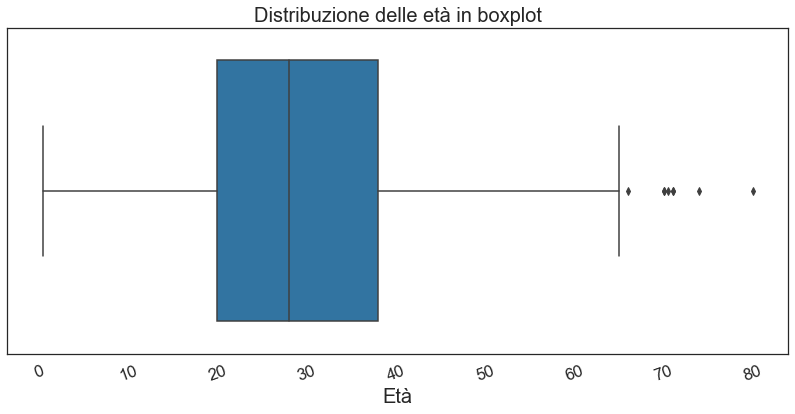

In [59]:
#boxplot contenente gli outliers
plt.figure(figsize=(14,6))
sns.set_context("notebook", font_scale=1.5, rc={"font.size":20, "axes.titlesize":20, "axes.labelsize":20})
sns.boxplot(x="Age", data=df2)
plt.title("Distribuzione delle età in boxplot")
plt.xlabel("Età")
plt.xticks(rotation=20)
plt.show()

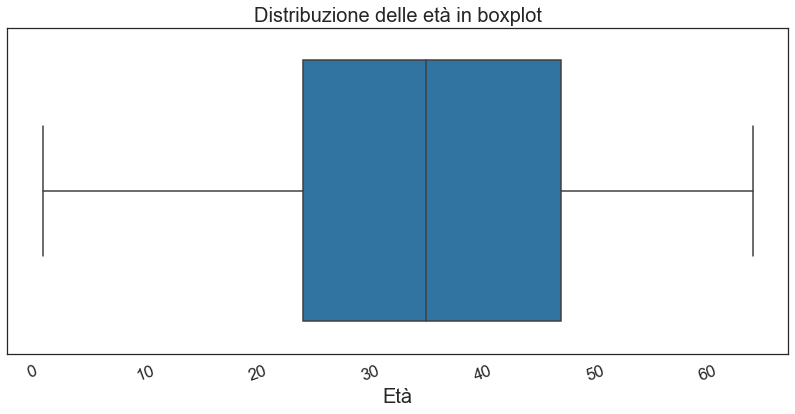

In [60]:
#boxplot con normalizzazione dati
plt.figure(figsize=(14,6))
sns.set_context("notebook", font_scale=1.5, rc={"font.size":20, "axes.titlesize":20, "axes.labelsize":20})
sns.boxplot(x="Age", data=NORMAL)
plt.title("Distribuzione delle età in boxplot")
plt.xlabel("Età")
plt.xticks(rotation=20)
plt.show()

In [61]:
NORMAL["Age"].describe()

count    178.000000
mean      34.704607
std       14.702831
min        0.920000
25%       24.000000
50%       35.000000
75%       47.000000
max       64.000000
Name: Age, dtype: float64

## Statistiche sul numero di fratelli/sorelle e/o sposi a bordo 


In [62]:
sibsp = df["SibSp"].value_counts()
sibsp

0    126
1     69
2      6
3      3
Name: SibSp, dtype: int64

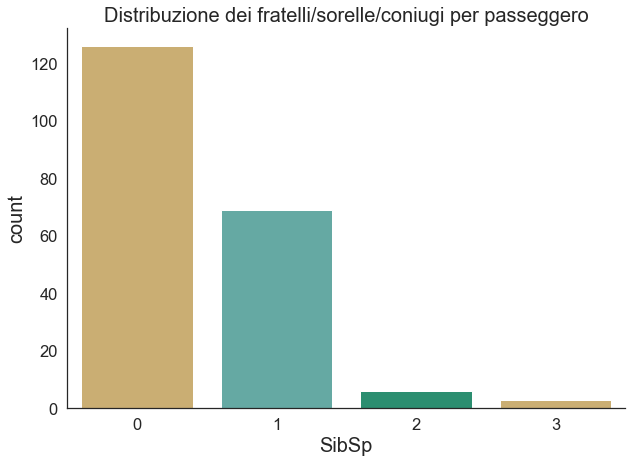

In [63]:
ax = sns.countplot(x="SibSp",data=df, palette= colorsbarre)
plt.rcParams["figure.figsize"] = [10,7]
sns.set_context("notebook", font_scale=1.5, rc={"font.size": 20, "axes.titlesize":20, "axes.labelsize":20})
sns.despine(right=True) 
ax.set(title = 'Distribuzione dei fratelli/sorelle/coniugi per passeggero')
plt.show()

## Statistiche sul numero di genitori e figli a bordo 

In [64]:
parch = df2["Parch"].value_counts()
parch

0    519
1    110
2     68
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

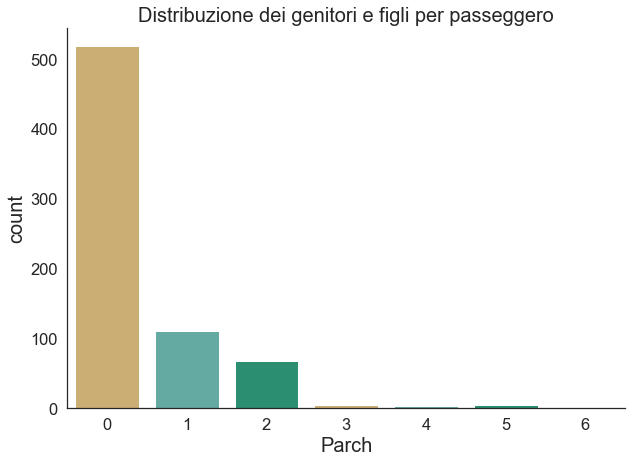

In [65]:
ax = sns.countplot(x="Parch",data=df2, palette= colorsbarre)
plt.rcParams["figure.figsize"] = [10,7]
sns.set_context("notebook", font_scale=1.5, rc={"font.size": 20, "axes.titlesize":20, "axes.labelsize":20})
sns.despine(right=True) 
ax.set(title = 'Distribuzione dei genitori e figli per passeggero')
plt.show()

## Statistiche sul costo del biglietto 

In [66]:
costo = df2["Fare"].value_counts()
costo

13.0000    41
26.0000    30
8.0500     29
10.5000    24
7.8958     23
           ..
82.1708     1
26.3875     1
25.5875     1
39.4000     1
10.5167     1
Name: Fare, Length: 219, dtype: int64

In [67]:
np.std(df2["Fare"])

52.901459095182766

In [68]:
df2["Fare"].mean() 

34.567251404494385

In [69]:
df2["Fare"].median()

15.64585

In [70]:
df2["Fare"].max()

512.3292

In [71]:
df2["Fare"].min()

0.0

In [72]:
Q1 = df2["Fare"].quantile(0.25, interpolation='linear')

In [73]:
Q3 = df2["Fare"].quantile(0.75, interpolation='linear')

In [74]:
IQR = Q3-Q1

In [75]:
Lowerfence = Q1 - 1.5*IQR
Upperfence = Q3 + 1.5*IQR

In [76]:
Lowerfence

-29.374999999999996

In [77]:
Upperfence

70.425

In [78]:
OUTLIERS2 = df2.loc[(df2["Fare"] < Lowerfence)  |  (df2["Fare"] > Upperfence) ]

In [79]:
NORMAL2 = df2.loc[(df2["Fare"] > Lowerfence)  & (df2["Fare"] < Upperfence) ]

In [80]:
OUTLIERS2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
27,28,0,1,"Fortune, Mr. Charles Alexander",0,19.0,3,2,19950,263.0000,C23 C25 C27,S
34,35,0,1,"Meyer, Mr. Edgar Joseph",0,28.0,1,0,PC 17604,82.1708,NaN,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",1,49.0,1,0,PC 17572,76.7292,D33,C
62,63,0,1,"Harris, Mr. Henry Birkhardt",0,45.0,1,0,36973,83.4750,C83,S


In [81]:
NORMAL2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S


In [82]:
df2["Fare"].describe()

count    712.000000
mean      34.567251
std       52.938648
min        0.000000
25%        8.050000
50%       15.645850
75%       33.000000
max      512.329200
Name: Fare, dtype: float64

In [83]:
df2["Fare"].iplot(kind = "hist", xTitle="Prezzo", yTitle="Count", title ="Distribuzione prezzi biglietto")

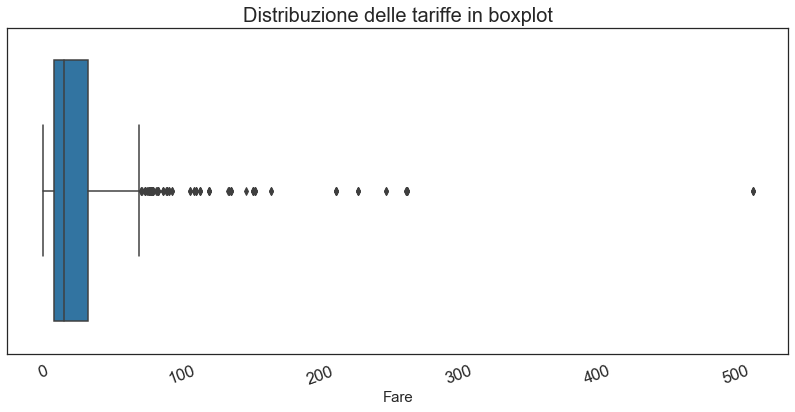

In [84]:
#boxplot contenente gli outliers
plt.figure(figsize=(14,6))
sns.set_context("notebook", font_scale=1.5, rc={"font.size":20, "axes.titlesize":20, "axes.labelsize":15})
sns.boxplot(x="Fare", data=df2)
plt.title("Distribuzione delle tariffe in boxplot")
plt.xlabel("Fare")
plt.xticks(rotation=20)
plt.show()

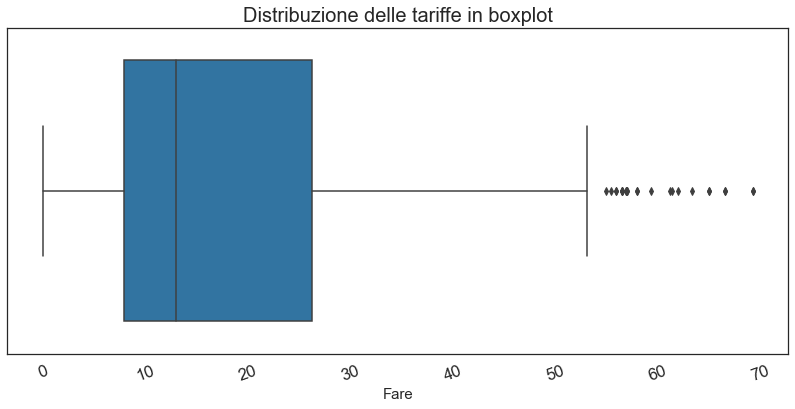

In [85]:
#boxplot con normalizzazione dati
plt.figure(figsize=(14,6))
sns.set_context("notebook", font_scale=1.5, rc={"font.size":20, "axes.titlesize":20, "axes.labelsize":15})
sns.boxplot(x="Fare", data=NORMAL2)
plt.title("Distribuzione delle tariffe in boxplot")
plt.xlabel("Fare")
plt.xticks(rotation=20)
plt.show()

In [86]:
NORMAL2["Fare"].describe()

count    617.000000
mean      19.026803
std       14.282146
min        0.000000
25%        7.925000
50%       13.000000
75%       26.283300
max       69.300000
Name: Fare, dtype: float64

## Statistiche sulle cabine 

In [87]:
Cabine = df["Cabin"].value_counts()
Cabine

Ponte Superiore                59
Ponte Passeggiata              47
Ponte Salone                   33
Ponte Principale               32
Ponte Passeggiata Superiore    15
Ponte Centrale                 13
Ponte Inferiore                 4
Ponte Imbarcazioni              1
Name: Cabin, dtype: int64

In [88]:
df["Cabin"].iplot(kind = "hist", xTitle="Cabine", yTitle="Count", title ="Distribuzione passeggeri nelle cabine")

## Statistiche sugli imbarchi

In [89]:
Imbarchi = df2["Embarked"].value_counts()
Imbarchi

S    554
C    130
Q     28
Name: Embarked, dtype: int64

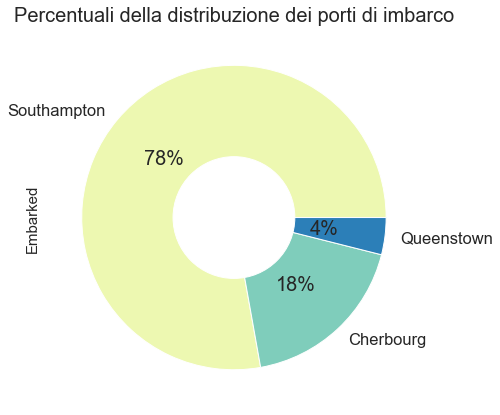

In [90]:
labels =["Southampton", "Cherbourg","Queenstown"]
plt.figure(figsize = (10,7))
sns.set_context("notebook", font_scale=1.5, rc={"font.size":20, "axes.titlesize":20, "axes.labelsize":15})
Imbarchi.plot.pie(labels = labels, autopct ="%1.0f%%", colors = colorstorta)
c = plt.Circle ((0,0), 0.4, color="white")
plt.gca().add_artist(c)
plt.title("Percentuali della distribuzione dei porti di imbarco")
plt.show()

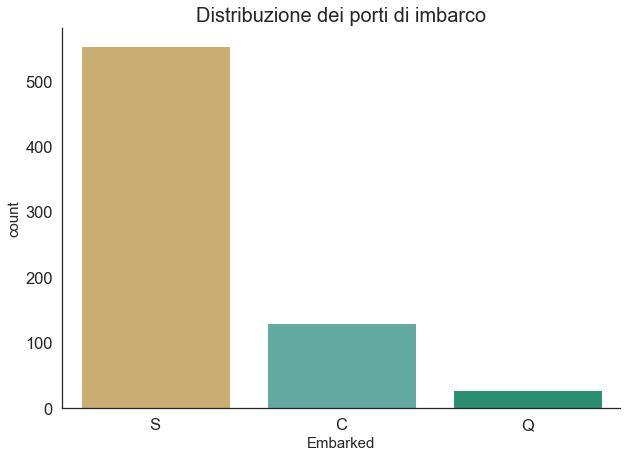

In [91]:
ax = sns.countplot(x="Embarked",data=df2, palette= colorsbarre)
plt.rcParams["figure.figsize"] = [10,7]
sns.set_context("notebook", font_scale=1.5, rc={"font.size": 20, "axes.titlesize":20, "axes.labelsize":20})
sns.despine(right=True) 
ax.set(title = 'Distribuzione dei porti di imbarco')
plt.show()

## Correlazioni

In [92]:
df2.corr() #calcolo della correlazione tra tutte le variabili quantitative del dataset
# (compresa la variabile "Sex" perché è stata binarizzata all'inizio)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.029526,-0.035609,-0.024674,0.033681,-0.082704,-0.011672,0.009655
Survived,0.029526,1.000000,-0.356462,0.536762,-0.082446,-0.015523,0.095265,0.266100
Pclass,-0.035609,-0.356462,1.000000,-0.150826,-0.365902,0.065187,0.023666,-0.552893
Sex,-0.024674,0.536762,-0.150826,1.000000,-0.099037,0.106296,0.249543,0.182457
Age,0.033681,-0.082446,-0.365902,-0.099037,1.000000,-0.307351,-0.187896,0.093143
SibSp,-0.082704,-0.015523,0.065187,0.106296,-0.307351,1.000000,0.383338,0.139860
Parch,-0.011672,0.095265,0.023666,0.249543,-0.187896,0.383338,1.000000,0.206624
Fare,0.009655,0.266100,-0.552893,0.182457,0.093143,0.139860,0.206624,1.000000


In [93]:
df2.corr().iplot(kind="heatmap", colorscale="spectral") # rendiamo visibili i valori di correlazione in un heatmap

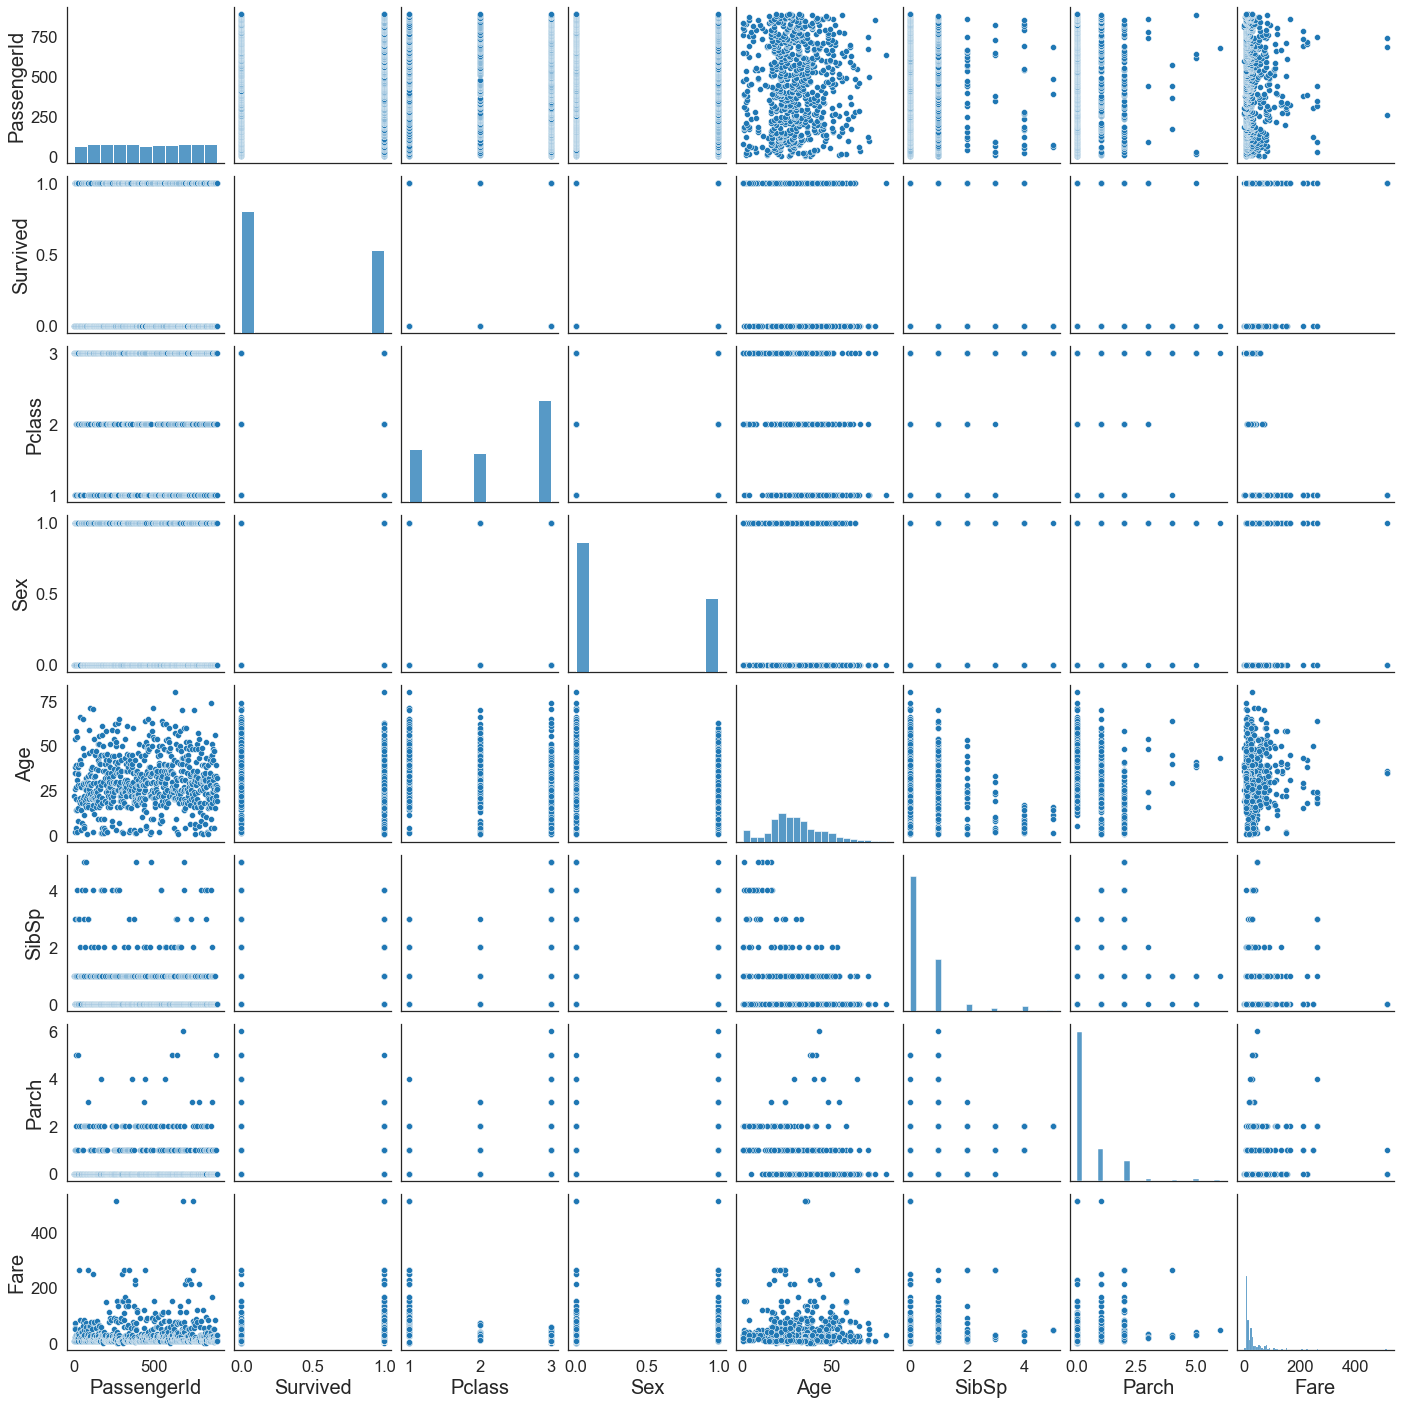

In [94]:
sns.pairplot(df2) #visualizzazione dei dati attraverso il pairplot
plt.show()

## Relazioni tra variabili:

### Costo del biglietto & Classe

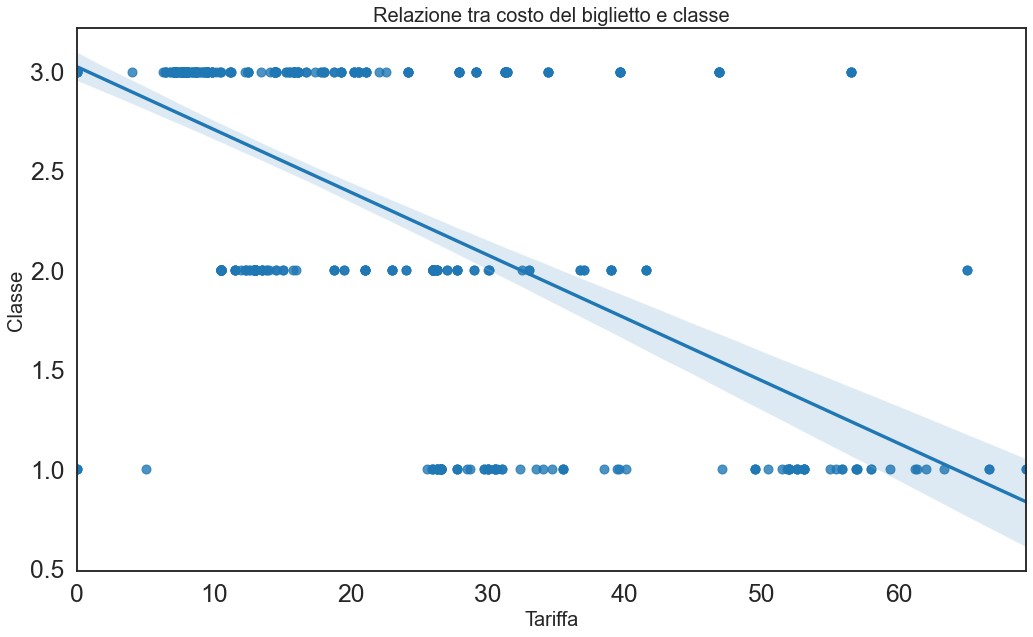

In [95]:
plt.rcParams["figure.figsize"] = [17,10]
sns.set_context("talk", font_scale=1.5, rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":20})
sns.set_style("white")
sns.regplot(x="Fare", y="Pclass", fit_reg=True, data=NORMAL2) 
#regplot calcola la regressione lineare
#fit_reg=True calcola la retta di interpolazione
plt.title("Relazione tra costo del biglietto e classe")
plt.xlabel("Tariffa")
plt.ylabel("Classe")
plt.show()

In [96]:
x = df2['Fare']
y = df2['Pclass']
(corr_pearson, pvalue) = sp.pearsonr(x, y)
print("Coefficiente di Pearson:", round(corr_pearson,2))
print("p-value:", round(pvalue,10))

Coefficiente di Pearson: -0.55
p-value: 0.0


### Età & Classe

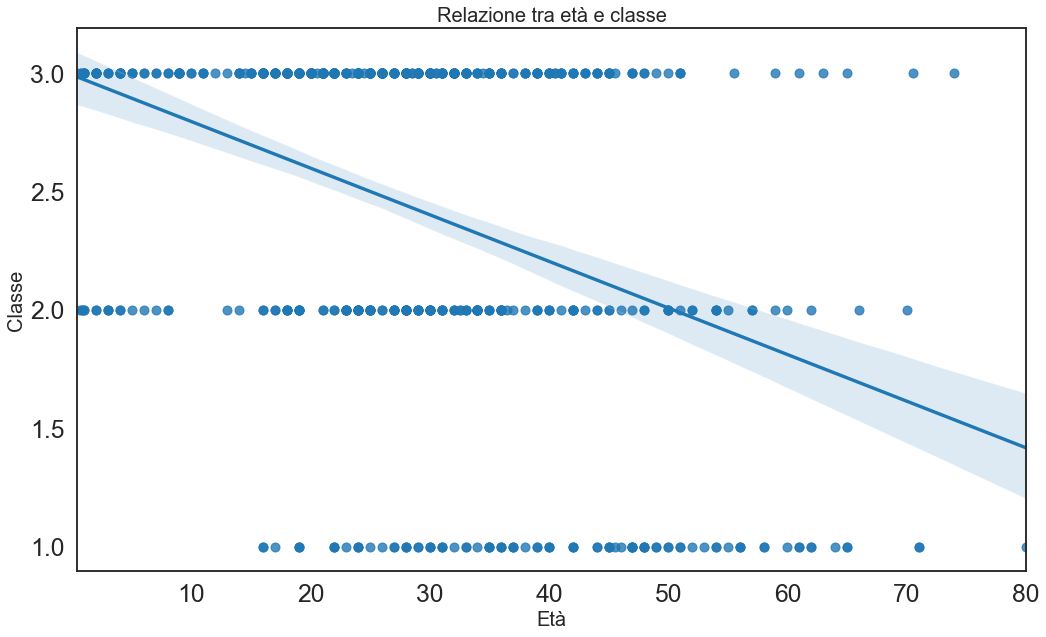

In [97]:
plt.rcParams["figure.figsize"] = [17,10]
sns.set_context("talk", font_scale=1.5, rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":20})
sns.set_style("white")
sns.regplot(x="Age", y="Pclass", fit_reg=True, data=NORMAL2) 
plt.title("Relazione tra età e classe")
plt.xlabel("Età")
plt.ylabel("Classe")
plt.show()

In [98]:
x = df2['Age']
y = df2['Pclass']
(corr_pearson, pvalue) = sp.pearsonr(x, y)
print("Coefficiente di Pearson:", round(corr_pearson,2))
print("p-value:", round(pvalue,100))

Coefficiente di Pearson: -0.37
p-value: 5.602787924368103e-24


## Sopravvissuti e età

In [99]:
df2.iplot(kind = 'bar', x = 'Age', y = 'Survived', xTitle ='Età', yTitle="Numero sopravvissuti",
                 title = 'Età in rapporto con i sopravvissuti')

In [100]:
x = df2['Age']
y = df2['Survived']
(corr_pearson, pvalue) = sp.pearsonr(x, y)
print("Coefficiente di Pearson:", round(corr_pearson,2))
print("p-value:", round(pvalue,100))

Coefficiente di Pearson: -0.08
p-value: 0.02782031625085229


In [101]:
# nonostante la correlazione lineare non sia significativa, anzi quasi nulla,
#abbiamo ritenuto necessario evidenziare il rapporto tra numero di sopravvisuti e età
#ai fini delle considerazioni finali

## Sesso & sopravvissuti

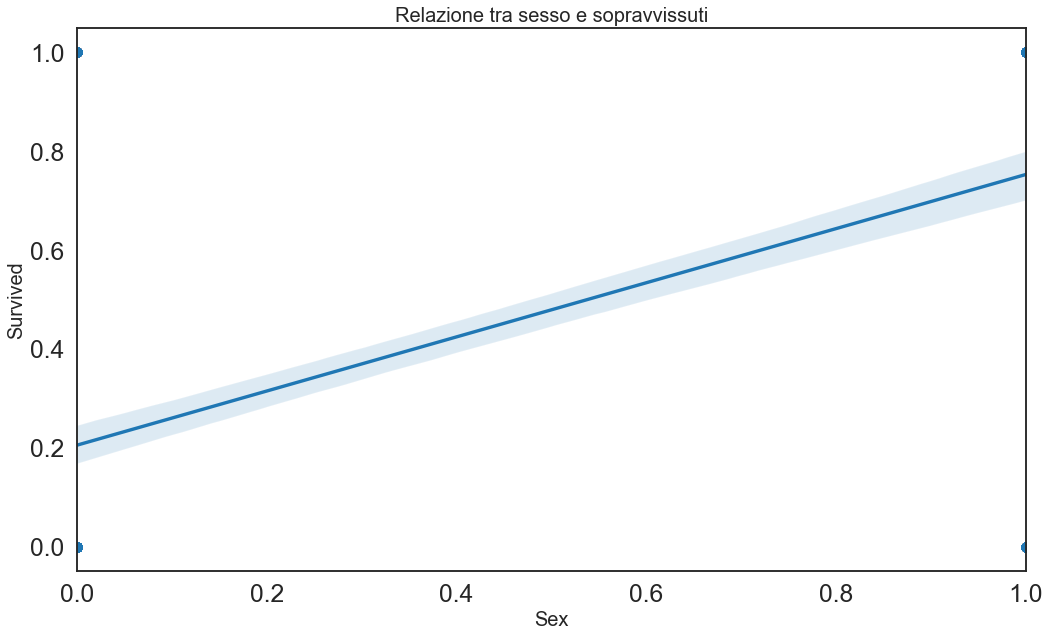

In [102]:
plt.rcParams["figure.figsize"] = [17,10]
sns.set_context("talk", font_scale=1.5, rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":20})
sns.set_style("white")
sns.regplot(x="Sex", y="Survived", fit_reg=True, data=df2) 
plt.title("Relazione tra sesso e sopravvissuti")
plt.xlabel("Sex")
plt.ylabel("Survived")
plt.show()

In [103]:
x = df2['Sex']
y = df2['Survived']
(corr_pearson, pvalue) = sp.pearsonr(x, y)
print("Coefficiente di Pearson:", round(corr_pearson,2))
print("p-value:", round(pvalue,100))

Coefficiente di Pearson: 0.54
p-value: 2.242851641983803e-54


### Genitori/figli & fratelli/sorelle/coniugi

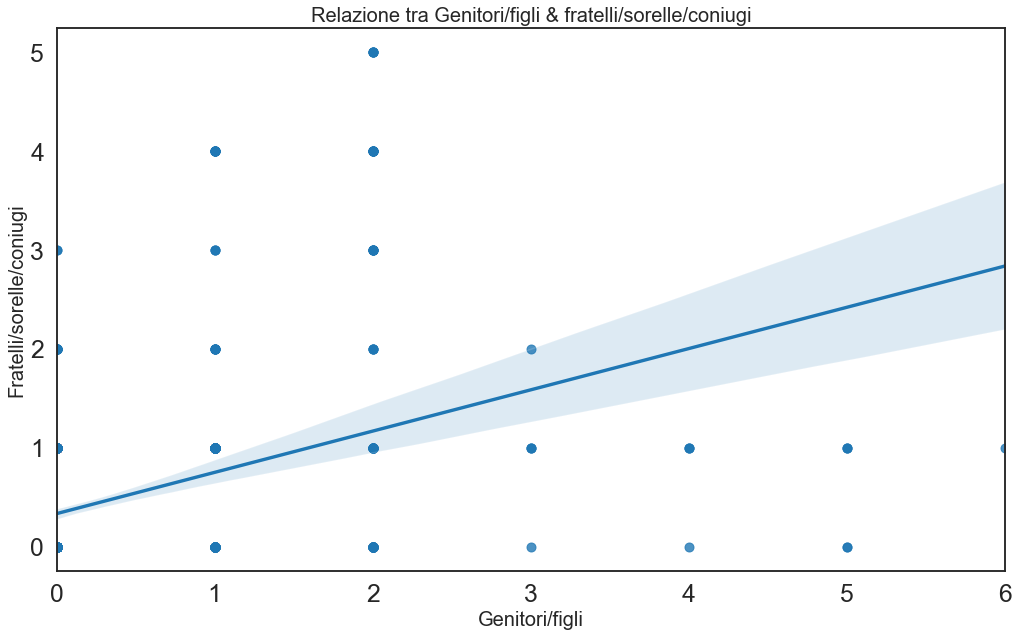

In [104]:
plt.rcParams["figure.figsize"] = [17,10]
sns.set_context("talk", font_scale=1.5, rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":20})
sns.set_style("white")
sns.regplot(x="Parch", y="SibSp", fit_reg=True, data=df2) 
plt.title("Relazione tra Genitori/figli & fratelli/sorelle/coniugi")
plt.xlabel("Genitori/figli")
plt.ylabel("Fratelli/sorelle/coniugi")
plt.show()

In [105]:
x = df2['Parch']
y = df2['SibSp']
(corr_pearson, pvalue) = sp.pearsonr(x, y)
print("Coefficiente di Pearson:", round(corr_pearson,2))
print("p-value:", round(pvalue,100))

Coefficiente di Pearson: 0.38
p-value: 2.429239133480412e-26


### Costo biglietto - Età - Sopravvissuti

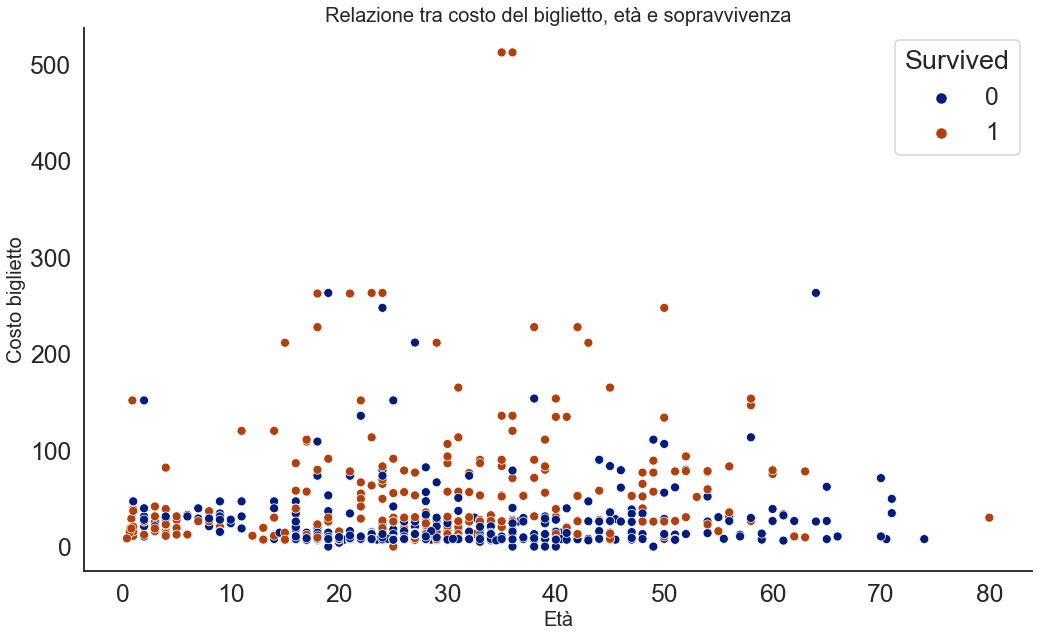

In [106]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df2, palette ="dark")
plt.rcParams["figure.figsize"] = [17,10]
sns.set_context("talk", font_scale=1.5, rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":20})
sns.set_style("white")
sns.despine(right=True) 
plt.title("Relazione tra costo del biglietto, età e sopravvivenza")
plt.xlabel("Età")
plt.ylabel("Costo biglietto")
plt.show()

### Classe - Numero figli/genitori - Sopravvissuti

In [107]:
crossSPS= pd.crosstab(df2["Pclass"], df2["Parch"], values=df2["Survived"], aggfunc=np.sum, normalize ="columns")

crossSPS

Parch,0,1,2,3,4,5,6
Pclass,,,,,,,
1,0.456522,0.327869,0.410256,0.000000,0.0,0.0,0.0
2,0.239130,0.393443,0.333333,0.666667,0.0,0.0,0.0
3,0.304348,0.278689,0.256410,0.333333,0.0,1.0,0.0


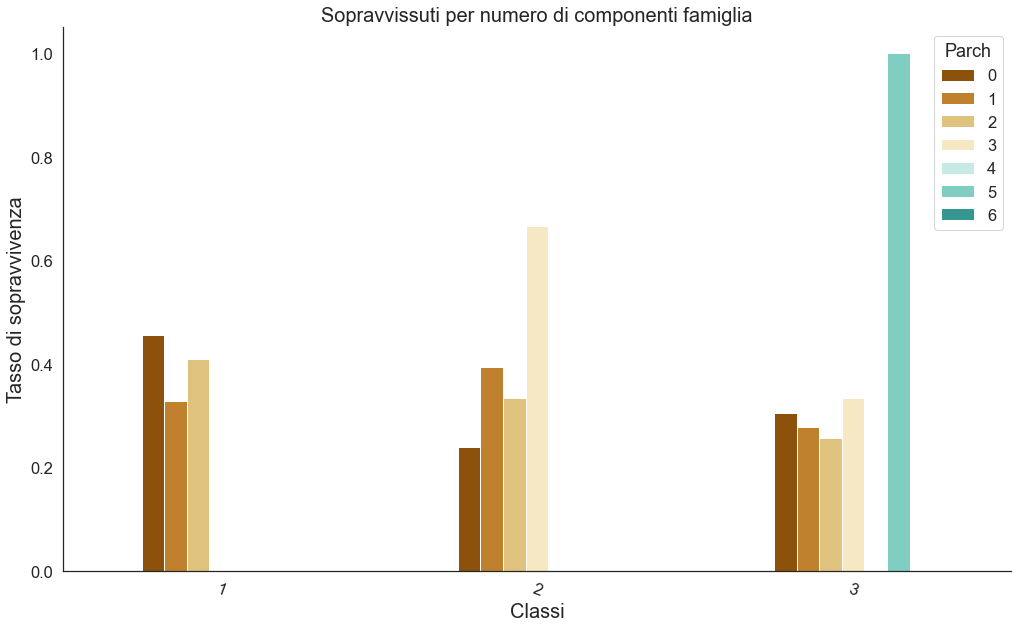

In [108]:
colorsstack = ['#8c510a','#bf812d','#dfc27d','#f6e8c3','#c7eae5','#80cdc1','#35978f','#01665e']
plt.rcParams["figure.figsize"] = [17,10]
sns.set_context("notebook", font_scale=1.5, rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":20})
sns.set_style("white")
crossSPS.plot(kind="bar", stacked=False,color=colorsstack)
sns.despine(right=True) 
plt.title('Sopravvissuti per numero di componenti famiglia')
plt.ylabel('Tasso di sopravvivenza')
plt.xlabel('Classi')
plt.xticks(rotation=-20)
plt.show()

### Classe - Cabina - Sopravvissuti

In [109]:
crossCCS= pd.crosstab(df["Pclass"], df["Cabin"], values=df["Survived"], aggfunc=np.sum, normalize ="columns")

crossCCS

Cabin,Ponte Centrale,Ponte Imbarcazioni,Ponte Inferiore,Ponte Passeggiata,Ponte Passeggiata Superiore,Ponte Principale,Ponte Salone,Ponte Superiore
Pclass,,,,,,,,
1,0.000,0.0,0.0,1.0,1.0,0.750,0.88,1.0
2,0.875,0.0,0.0,0.0,0.0,0.125,0.12,0.0
3,0.125,0.0,1.0,0.0,0.0,0.125,0.00,0.0


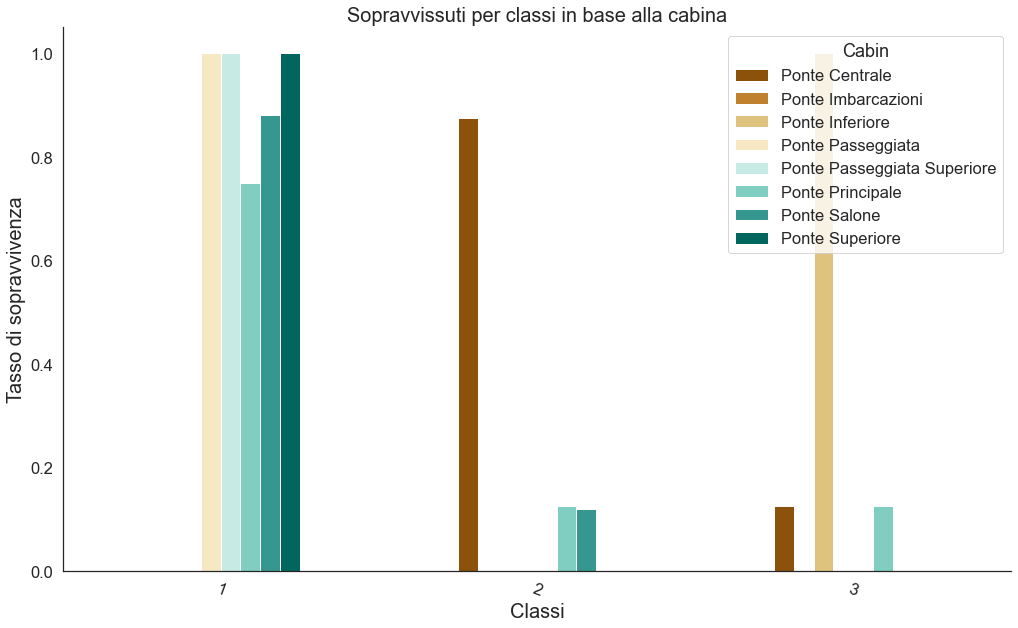

In [110]:
colorsstack = ['#8c510a','#bf812d','#dfc27d','#f6e8c3','#c7eae5','#80cdc1','#35978f','#01665e']
plt.rcParams["figure.figsize"] = [17,10]
sns.set_context("notebook", font_scale=1.5, rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":20})
sns.set_style("white")
crossCCS.plot(kind="bar", stacked=False,color=colorsstack)
sns.despine(right=True) 
plt.title('Sopravvissuti per classi in base alla cabina')
plt.ylabel('Tasso di sopravvivenza')
plt.xlabel('Classi')
plt.xticks(rotation=-20)
plt.show()

### Classe - Sesso - Sopravvissuti

In [111]:
crossCSS= pd.crosstab(df2["Pclass"], df2["Sex"], values=df2["Survived"], aggfunc=np.sum)
crossCSS

Sex,0,1
Pclass,,
1,40,80
2,15,68
3,38,47


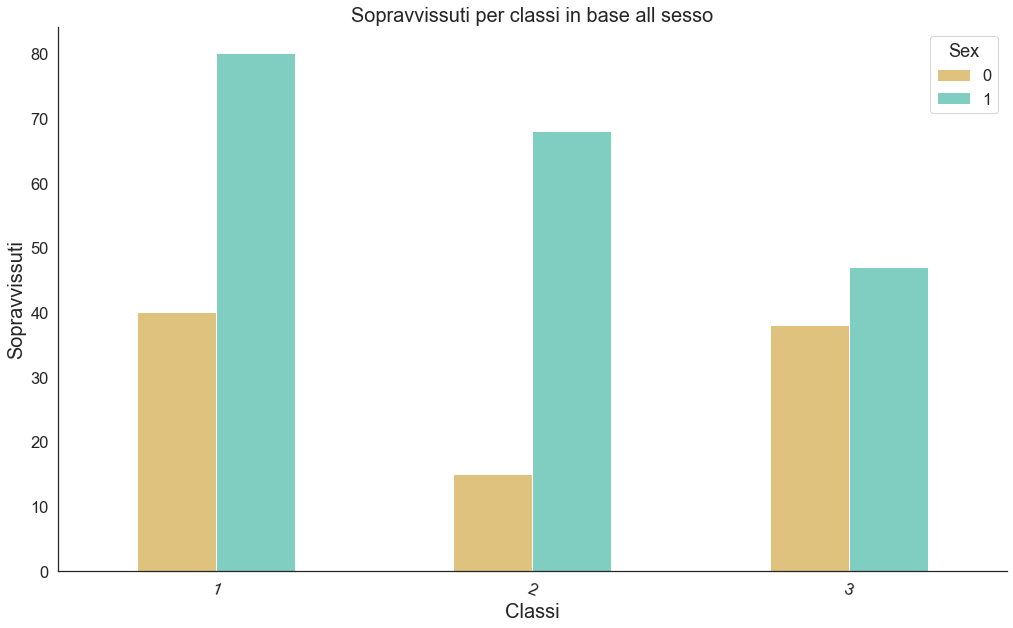

In [112]:
colorsstack = ['#dfc27d','#80cdc1']
plt.rcParams["figure.figsize"] = [17,10]
sns.set_context("notebook", font_scale=1.5, rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":20})
sns.set_style("white")
crossCSS.plot(kind="bar", stacked=False,color=colorsstack)
sns.despine(right=True) 
plt.title('Sopravvissuti per classi in base all sesso')
plt.ylabel('Sopravvissuti')
plt.xlabel('Classi')
plt.xticks(rotation=-20)
plt.show()